In [1]:
from os import path
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from laptrack import LapTrack
from laptrack import datasets
import napari
from skimage import io

plt.rcParams["font.family"] = ""

Loading Dataset

In [2]:
path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/spots_intensities_c3_all.pkl'
spots_df = pd.read_pickle(path)

In [3]:
spots_df.head()

,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame
0,206.593249,11.0,12.0,0.0,2.0,2.0,4.0,0
1,198.333333,69.0,52.0,-2.0,2.0,2.0,7.0,0
2,207.348417,103.0,123.0,4.0,3.0,2.0,36.0,0
3,185.333333,104.0,244.0,-2.0,4.0,2.0,7.0,0
4,191.000000,36.0,88.0,1.0,2.0,1.0,2.0,0


In [5]:
spots_df[800:810]

,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame
800,339.000000,137.0,176.0,25.0,1.0,1.0,3.0,1
801,177.000000,167.0,28.0,26.0,3.0,2.0,5.0,1
802,232.000000,172.0,42.0,25.0,1.0,2.0,3.0,1
803,343.666667,188.0,200.0,27.0,1.0,2.0,1.0,1
804,224.539881,71.0,12.0,26.0,2.0,2.0,4.0,1
805,307.253023,136.0,170.0,27.0,2.0,2.0,3.0,1
806,248.134770,173.0,58.0,26.0,2.0,1.0,3.0,1
807,231.333333,59.0,48.0,27.0,2.0,2.0,2.0,1
808,319.891767,91.0,107.0,27.0,2.0,1.0,3.0,1
809,237.000000,94.0,232.0,27.0,1.0,1.0,3.0,1


Loading 3_D dataset

In [6]:
max_distance = 3
lt = LapTrack(
    track_dist_metric="sqeuclidean",  # The similarity metric for particles. See `scipy.spatial.distance.cdist` for allowed values.
    splitting_dist_metric="sqeuclidean",
    merging_dist_metric="sqeuclidean",
    # the square of the cutoff distance for the "sqeuclidean" metric
    track_cost_cutoff=max_distance**2,
    gap_closing_cost_cutoff = (2*max_distance)**2,
    gap_closing_max_frame_count = 1,
    splitting_cost_cutoff=False,  # or False for non-splitting case
    merging_cost_cutoff=False,  # or False for non-merging case
)

In [7]:
import time 

start_time = time.time()

track_df, split_df, merge_df = lt.predict_dataframe(
    spots_df,
    coordinate_cols=[
        "mu_x",
        "mu_y",
        "mu_z"
    ],  # the column names for the coordinates
    frame_col="frame",  # the column name for the frame (default "frame")
    only_coordinate_cols=False,  # if False, returned track_df includes columns not in coordinate_cols.
    # False will be the default in the major release.
)

end_time = time.time()

execution_time = end_time - start_time
print(f"Total execution time: {execution_time} seconds")

Total execution time: 143.2102348804474 seconds


In [8]:
track_df = track_df.reset_index()

In [9]:
c3_tracking_pickle_file = "/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/track_df_c3_all.pkl"

# Save the DataFrame to a pickle file
track_df.to_pickle(c3_tracking_pickle_file)

`track_df` is the original dataframe with additional columns "track_id" and "tree_id".

The track_id is a unique id for each track segments without branches. A new id is assigned when a splitting and merging occured. 

The tree_id is a unique id for each "clonal" tracks sharing the same ancestor.

In [10]:
track_df[1420:1435]

,frame,index,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame_y,tree_id,track_id
1420,2,273,245.333333,201.0,188.0,37.0,1.0,2.0,3.0,2,272,272
1421,2,274,223.516541,208.0,97.0,38.0,2.0,2.0,1.0,2,676,676
1422,2,275,280.000000,82.0,17.0,38.0,1.0,1.0,2.0,2,262,262
1423,2,276,208.554661,101.0,199.0,42.0,2.0,3.0,9.0,2,667,667
1424,2,277,443.000000,103.0,218.0,37.0,1.0,1.0,2.0,2,282,282
1425,2,278,220.000000,153.0,25.0,37.0,2.0,2.0,3.0,2,833,833
1426,2,279,190.000000,164.0,60.0,37.0,2.0,2.0,3.0,2,834,834
1427,2,280,197.333333,180.0,111.0,33.0,2.0,1.0,8.0,2,835,835
1428,2,281,286.279003,119.0,190.0,38.0,2.0,2.0,3.0,2,278,278
1429,2,282,231.575740,155.0,147.0,38.0,3.0,2.0,3.0,2,275,275


In [11]:
## finding unique track ids 
track_df['track_id'].unique()

array([    0,     1,     2, ..., 20540, 20541, 20542])

In [12]:
track_df['track_id'].nunique()

20543

In [13]:
# Find the count of each tree_id
tree_id_counts = track_df['track_id'].value_counts()

# Get the tree_ids that have occurred more than 9 times
selected_tree_ids = tree_id_counts[tree_id_counts > 9].index

# Filter the DataFrame to get rows with the selected tree_ids
filtered_df = track_df[track_df['track_id'].isin(selected_tree_ids)]

filtered_df = filtered_df.reset_index()

# Print the filtered DataFrame
filtered_df.head()

,level_0,frame,index,amplitude,mu_x,mu_y,mu_z,sigma_x,sigma_y,sigma_z,frame_y,tree_id,track_id
0,0,0,0,206.593249,11.0,12.0,0.0,2.0,2.0,4.0,0,0,0
1,9,0,9,254.409872,73.0,29.0,0.0,2.0,2.0,4.0,0,9,9
2,28,0,28,239.397881,113.0,100.0,2.0,2.0,2.0,3.0,0,28,28
3,29,0,29,219.333333,120.0,238.0,2.0,2.0,1.0,3.0,0,29,29
4,30,0,30,285.000000,130.0,153.0,2.0,2.0,2.0,2.0,0,30,30


In [14]:
## finding unique track ids that exist throughout the 10 timestamps 
filtered_df['track_id'].unique()

array([    0,     9,    28, ..., 19253, 19327, 19365])

In [15]:
print(len(filtered_df['tree_id'].unique()))

1240


# Visualisation Using Napari

In [16]:
# Create a napari viewer
viewer = napari.Viewer()

# Replace 'your_file.tif' with the path to your 4D TIFF file
file_path = '/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/Channel3_complete.tif'

# Load the TIFF file using skimage
raw_image = io.imread(file_path)

# Add the 4D stack to the viewer
layer_raw = viewer.add_image(raw_image)

# Add Bounding Box
layer_raw.bounding_box.visible = True

1   HIToolbox                           0x00007ff823c38726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff823c382b8 _ZN15MenuBarInstance14EnableAutoShowEv + 52
3   HIToolbox                           0x00007ff823ba7cd7 _ZN15MenuBarInstance21UpdateAggregateUIModeE21MenuBarAnimationStylehhh + 1113
4   HIToolbox                           0x00007ff823c38173 _ZN15MenuBarInstance19SetFullScreenUIModeEjj + 175
5   AppKit                              0x00007ff81d7094b7 -[NSApplication _setPresentationOptions:instance:flags:] + 1145
6   AppKit                              0x00007ff81d55e165 -[NSApplication _updateFullScreenPresentationOptionsForInstance:] + 582
7   AppKit                              0x00007ff81dfaca40 -[_NSFullScreenSpace(PresentationInstance) activateFullScreenPresentationOptions] + 207
8   AppKit                              0x00007ff81ddff848 -[_NSEnterFullScreenTransitionController _doSucceededToEnterFullScreen] + 721


In [17]:
viewer.add_tracks(filtered_df[["track_id", "frame", "mu_z", "mu_y", "mu_x"]], name = 'tracks_9_frames')
viewer.add_tracks(track_df[["track_id", "frame", "mu_z", "mu_y", "mu_x"]], name = 'all_tracks')

<Tracks layer 'all_tracks' at 0x7fb1e5e76650>

In [18]:
points_layer = viewer.add_points(filtered_df[["frame", "mu_z", "mu_y", "mu_x"]], size=3, 
                                name = 'filtered_points', face_color = 'r', symbol = 'ring')
all_points_layer = viewer.add_points(track_df[["frame", "mu_z", "mu_y", "mu_x"]], size=2,
                                name = 'all_points', face_color = 'white', symbol = 'o')

1   HIToolbox                           0x00007ff823c38726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff823bdc852 SetMenuBarObscured + 226
3   HIToolbox                           0x00007ff823bdc4ca _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 164
4   HIToolbox                           0x00007ff823bd6996 _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 252
5   HIToolbox                           0x00007ff823b9ebd2 _NotifyEventLoopObservers + 153
6   HIToolbox                           0x00007ff823bd63e6 AcquireEventFromQueue + 494
7   HIToolbox                           0x00007ff823bc53ec ReceiveNextEventCommon + 285
8   HIToolbox                           0x00007ff823bc52b3 _BlockUntilNextEventMatchingListInModeWithFilter + 70
9   AppKit                              0x00007ff81d3ccf33 _DPSNextEvent + 909
10  AppKit                              0x00007ff81d3cbdb4 -[NSApplication(NSEvent) _ne

# Graphs 

In [30]:
temp = filtered_df[filtered_df['track_id']==179]

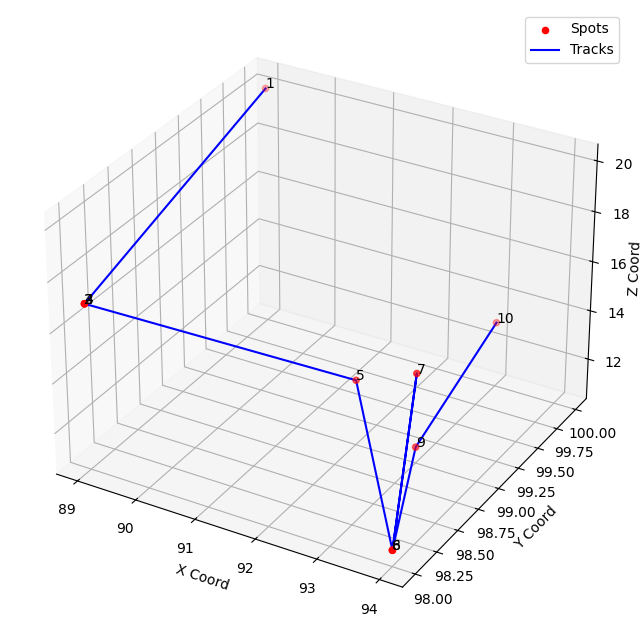

In [31]:
# Create a 3-D figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(temp['mu_x'], temp['mu_y'], temp['mu_z'], c='r', marker='o', label='Spots')

# Connect the points with lines
ax.plot(temp['mu_x'], temp['mu_y'], temp['mu_z'], c='b', linestyle='-', label='Tracks')

# Set labels for the axes
ax.set_xlabel('X Coord')
ax.set_ylabel('Y Coord')
ax.set_zlabel('Z Coord', labelpad=-2, rotation=100)


# Add a legend
ax.legend()

# Label the points in the order they were plotted
for i, (xi, yi, zi) in enumerate(zip(temp['mu_x'], temp['mu_y'], temp['mu_z'])):
    label = f'{i + 1}'
    ax.text(xi, yi, zi, label, fontsize=10)
    
# Show the plot
plt.show()

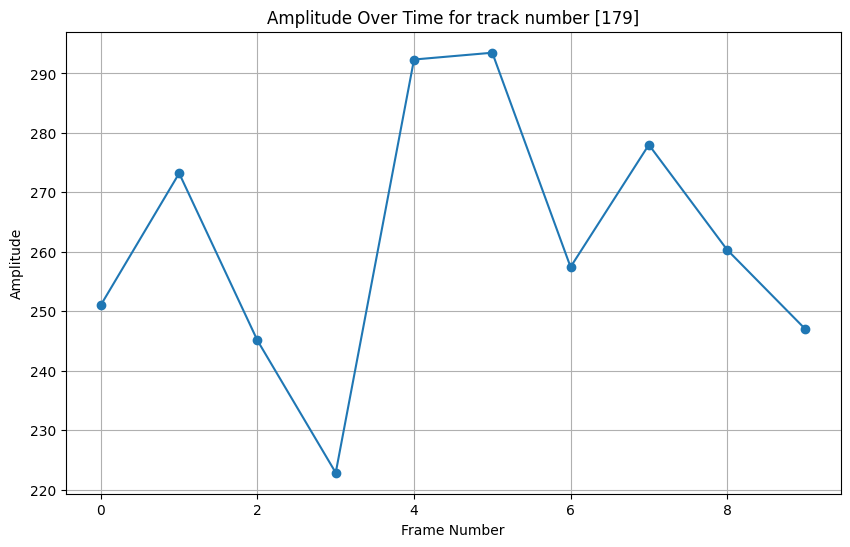

1   HIToolbox                           0x00007ff817ccb726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff817c94638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff812f3a74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff81324d04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff81324cf71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80e0b97fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80e0baa44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80e0c77b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80e0c73f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

In [32]:
# Create a time series plot
track_id = temp['track_id'].unique()
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.plot(temp['frame'], temp['amplitude'], marker='o', linestyle='-')
plt.xlabel('Frame Number')
plt.ylabel('Amplitude')
plt.title(f'Amplitude Over Time for track number {track_id}')
plt.grid(True)

plt.show()

# Misc Code Goes Here 

In [ ]:
'''
Ignore these range limit matching steps for now. 

# Define the range limits

#x_min = 79, x_max = 87, y_min = 49, y_max = 62, z_min = 36, z_max = 46
x_min = 81
x_max = 87
y_min = 49
y_max = 53
z_min = 34
z_max = 46

# Create a boolean mask to filter rows within the specified range
mask2 = (filtered_df['mu_x'] >= x_min) & (filtered_df['mu_x'] <= x_max) & (filtered_df['mu_y'] >= y_min) & (filtered_df['mu_y'] <= y_max) & (filtered_df['mu_z'] >= z_min) & (filtered_df['mu_z'] <= z_max)

temp2 = filtered_df[mask2]
''''